<a href="https://colab.research.google.com/github/Yuvrajk2809/CodSoft/blob/Supervised-Learning-Project/Linear_Regression_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
data = files.upload()

Saving Ecommerce Customers to Ecommerce Customers


In [ ]:
customers=pd.read_csv('Ecommerce Customers')

In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [ ]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [ ]:
customers.corr()

<ipython-input-7-0aeb4a05ccb0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  customers.corr()


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


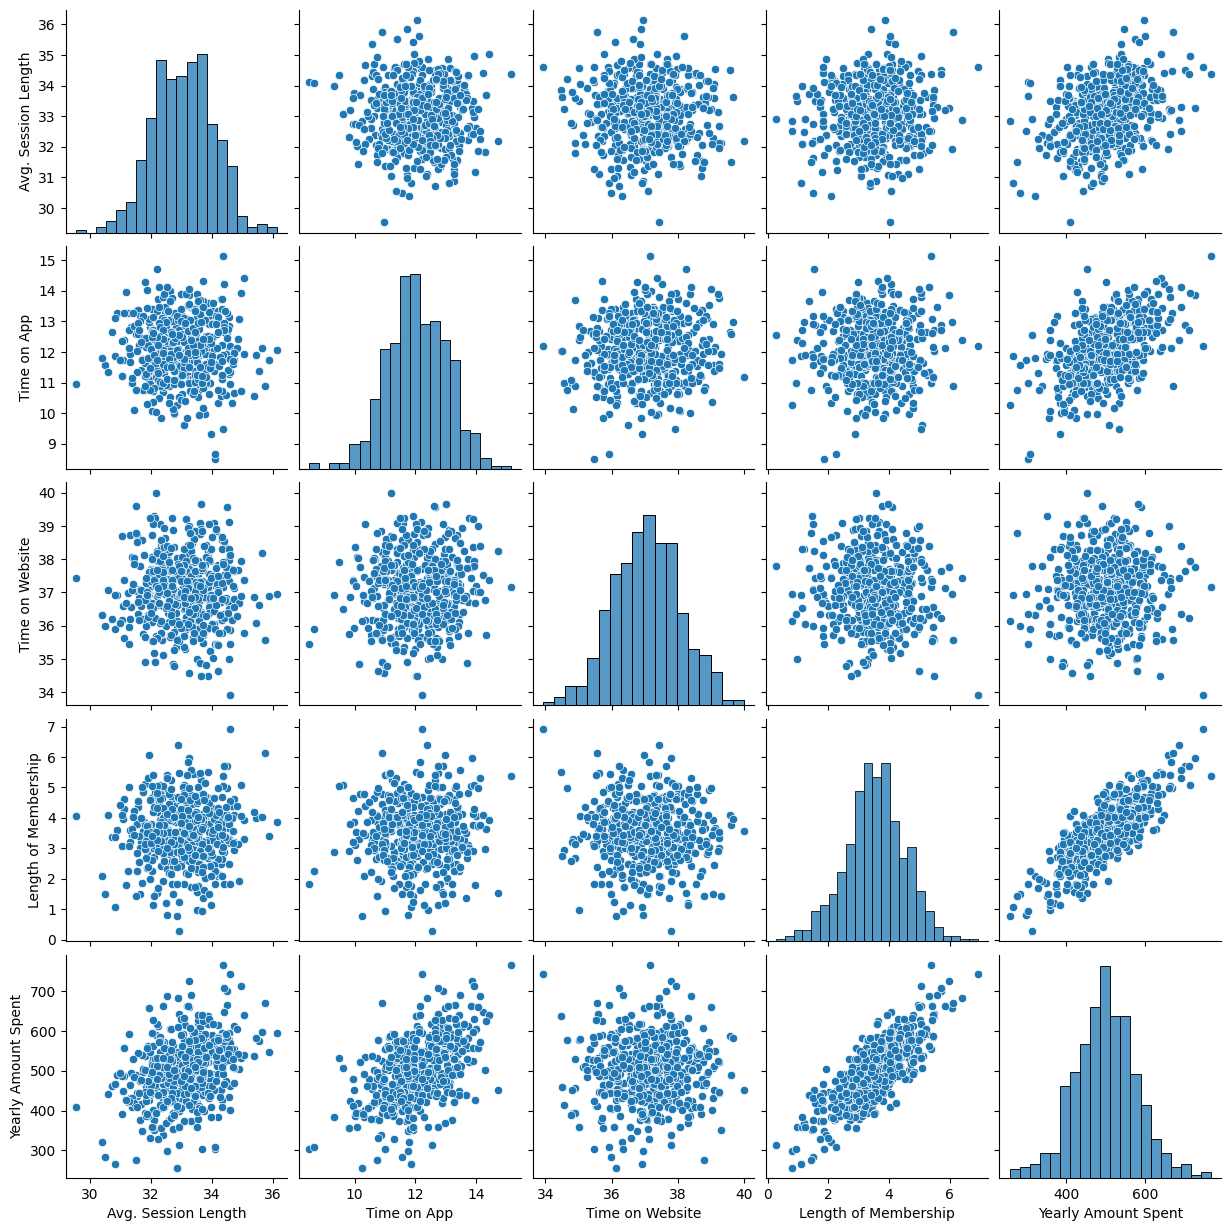

In [ ]:
sns.pairplot(customers)

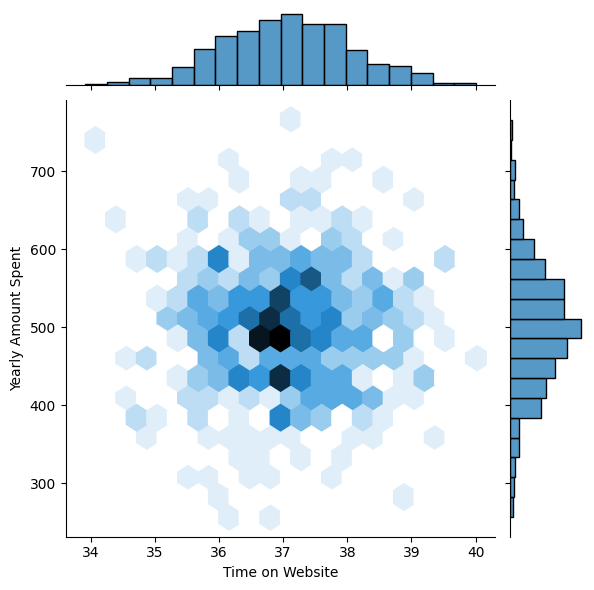

In [ ]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers,kind='hex')

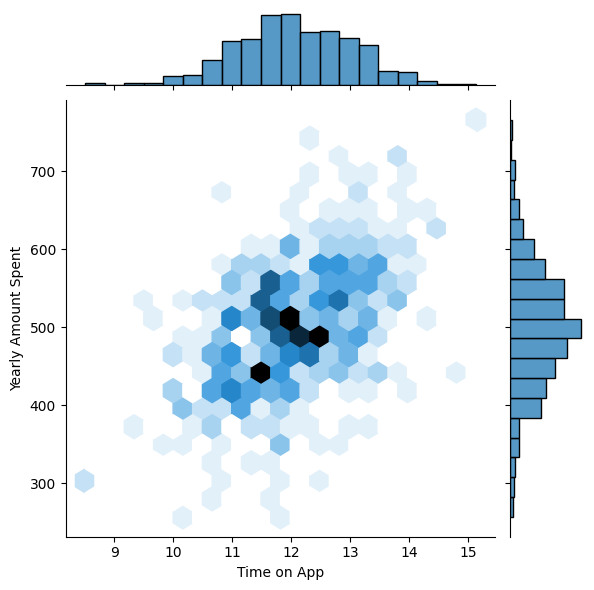

In [ ]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers,kind='hex')

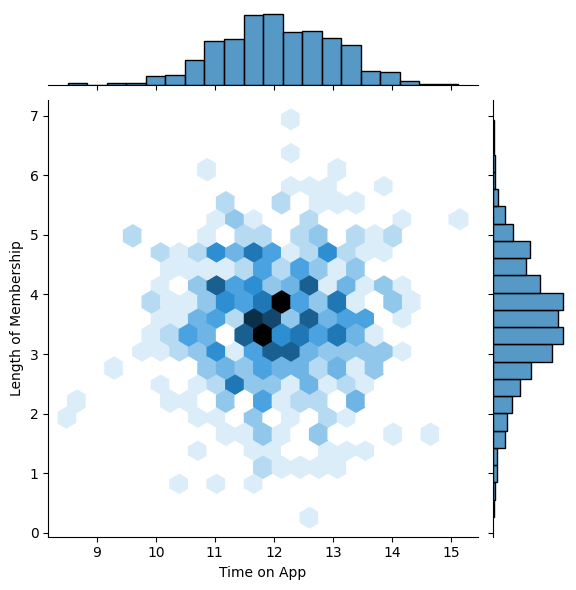

In [ ]:
sns.jointplot(x='Time on App',y='Length of Membership',data=customers,kind='hex')

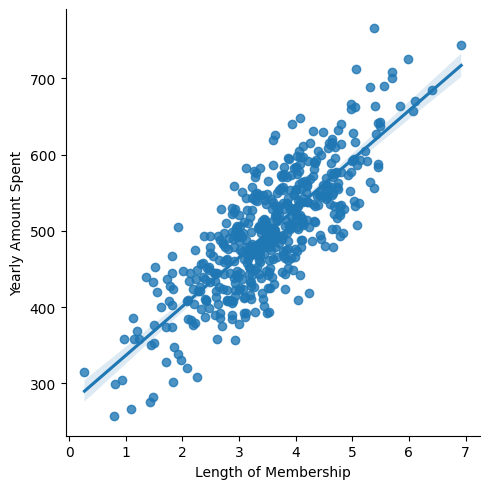

In [ ]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

In [ ]:
#Training and Testing Data
X=customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y=customers['Yearly Amount Spent']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
print(X_train.shape)

(350, 4)


In [ ]:
print(X_test.shape)

(150, 4)


In [ ]:
print(y_train.shape)

(350,)


In [ ]:
print(y_test.shape)

(150,)


In [ ]:
X_test.mean()

Avg. Session Length     33.109130
Time on App             12.094260
Time on Website         37.011818
Length of Membership     3.514378
dtype: float64

In [ ]:
#Training the Model
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [ ]:
X.mean()

Avg. Session Length     33.053194
Time on App             12.052488
Time on Website         37.060445
Length of Membership     3.533462
dtype: float64

In [ ]:
#Prediction
predictions = lm.predict(X_test)

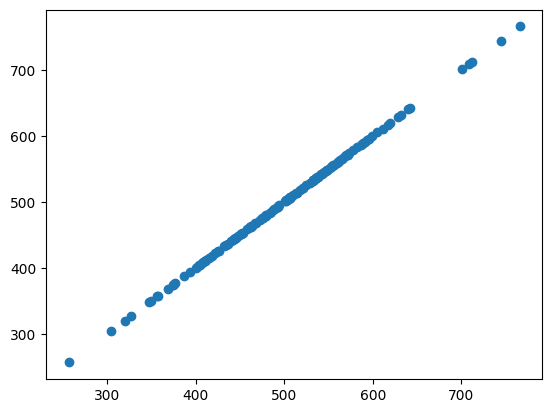

In [ ]:
plt.scatter(y_test,y_test)

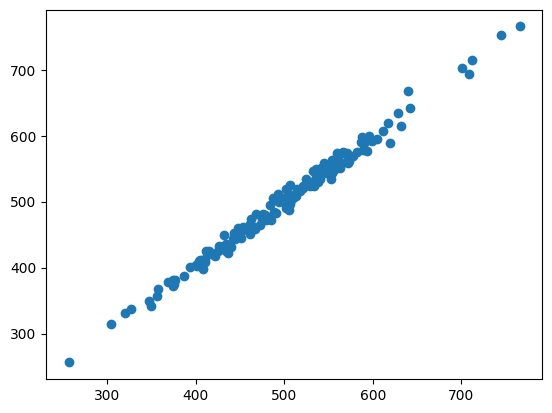

In [ ]:
plt.scatter(y_test,predictions)

In [ ]:
#Regression Evaluation Metrics
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430826
MSE: 79.81305165097427
RMSE: 8.933815066978624


<ipython-input-31-b4bc4d597598>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=80)


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

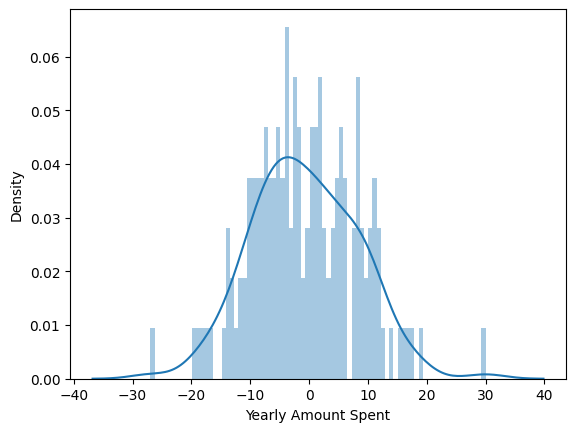

In [ ]:
sns.distplot((y_test-predictions),bins=80)

(array([1., 0., 0., 0., 0., 0., 1., 1., 2., 1., 1., 4., 2., 2., 6., 7., 6.,
        7., 7., 7., 9., 8., 6., 6., 7., 9., 2., 7., 6., 3., 7., 5., 4., 5.,
        4., 1., 0., 2., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([-26.95573072, -25.81664466, -24.67755861, -23.53847256,
        -22.3993865 , -21.26030045, -20.1212144 , -18.98212835,
        -17.84304229, -16.70395624, -15.56487019, -14.42578414,
        -13.28669808, -12.14761203, -11.00852598,  -9.86943992,
         -8.73035387,  -7.59126782,  -6.45218177,  -5.31309571,
         -4.17400966,  -3.03492361,  -1.89583755,  -0.7567515 ,
          0.38233455,   1.5214206 ,   2.66050666,   3.79959271,
          4.93867876,   6.07776481,   7.21685087,   8.35593692,
          9.49502297,  10.63410903,  11.77319508,  12.91228113,
         14.05136718,  15.19045324,  16.32953929,  17.46862534,
         18.6077114 ,  19.74679745,  20.8858835 ,  22.02496955,
         23.16405561,  24.30314166,  25.44222771,  26.58131376,
      

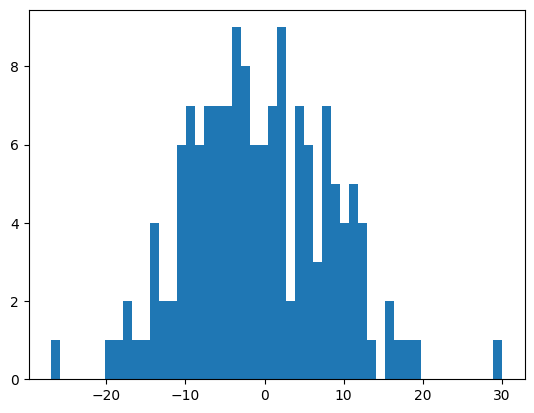

In [ ]:
plt.hist((y_test-predictions),bins=50)

In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
